In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb

In [3]:
dataset = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/80%20cereals/cereal.csv")

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [5]:
dataset.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [6]:
dataset.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [7]:
mfrcat = list(dataset["mfr"].unique())
mfrnum = list(range(len(mfrcat)))
mfrencoding=dict(zip(mfrcat,mfrnum))
mfrencoding

{'N': 0, 'Q': 1, 'K': 2, 'R': 3, 'G': 4, 'P': 5, 'A': 6}

In [8]:
dataset["mfr"] = dataset["mfr"].map(mfrencoding)
dataset.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,0,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,1,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,2,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,2,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,3,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [9]:
dataset["type"] = dataset["type"].map({"C":0,"H":1})
dataset.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,0,0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,1,0,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,2,0,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,2,0,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,3,0,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [10]:
dataset["calories"].describe()

count     77.000000
mean     106.883117
std       19.484119
min       50.000000
25%      100.000000
50%      110.000000
75%      110.000000
max      160.000000
Name: calories, dtype: float64

In [11]:
removeIndex = list(dataset.loc[dataset["sugars"]<1].index)
removeIndex

[3, 20, 54, 55, 57, 63, 64, 65]

In [12]:
dataset.drop(removeIndex,inplace=True)
dataset.drop(list(dataset.loc[dataset["potass"]<1].index),inplace=True)

In [13]:
dataset.describe()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,3.073529,0.014706,110.441176,2.514706,1.088235,174.632353,2.000000,14.764706,7.735294,96.176471,31.250000,2.235294,1.050735,0.822941,39.743161
std,1.374785,0.121268,15.875808,1.085765,1.003506,73.053426,2.029631,3.838601,3.972358,67.054876,21.758083,0.812544,0.127224,0.238497,10.846888
min,0.000000,0.000000,70.000000,1.000000,0.000000,0.000000,0.000000,5.000000,1.000000,20.000000,0.000000,1.000000,1.000000,0.250000,18.042851
25%,2.000000,0.000000,100.000000,2.000000,0.000000,140.000000,0.000000,12.000000,3.750000,40.000000,25.000000,2.000000,1.000000,0.670000,31.384493
50%,3.000000,0.000000,110.000000,2.500000,1.000000,180.000000,1.750000,14.500000,7.500000,90.000000,25.000000,2.000000,1.000000,0.750000,39.250156
75%,4.000000,0.000000,120.000000,3.000000,2.000000,220.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,46.718044
max,6.000000,1.000000,160.000000,6.000000,5.000000,320.000000,10.000000,23.000000,15.000000,320.000000,100.000000,3.000000,1.500000,1.500000,68.402973


In [14]:
corelation= dataset.corr()

<AxesSubplot:>

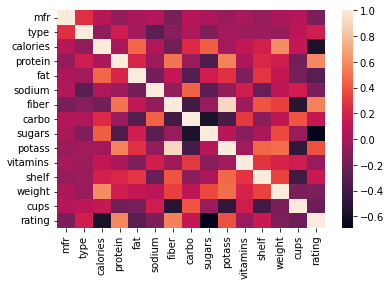

In [15]:
sb.heatmap(corelation)

<AxesSubplot:xlabel='protein', ylabel='rating'>

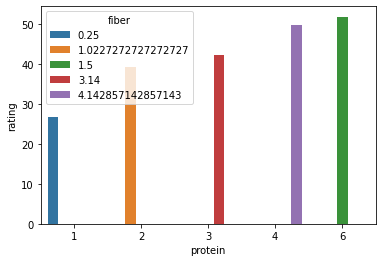

In [16]:
protein = dataset.groupby(["protein"]).mean().reset_index()
sb.barplot(x="protein",y="rating",data=protein,hue="fiber")

<AxesSubplot:xlabel='sugars', ylabel='mfr'>

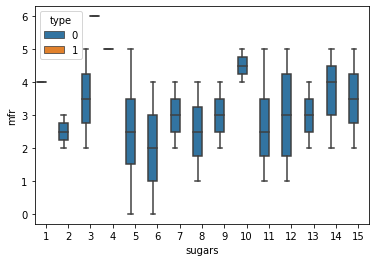

In [17]:
sugar = dataset.groupby(["sugars","type","mfr"]).size().reset_index().rename(columns={0:"counts"})
sb.boxplot(x="sugars",y="mfr",data=sugar,hue="type")

<AxesSubplot:xlabel='sugars', ylabel='mfr'>

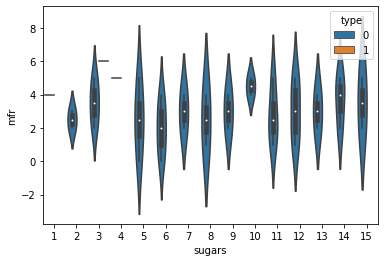

In [18]:
sb.violinplot(x="sugars",y="mfr",data=sugar,hue="type")